# Sensitivity Test, Bio-Fennel Model vs Bio_Franks_Model
This program reads and plots Bio Fennel and Bio_Franks model results from the Regional Ocean Modeling System (ROMS).

Test sensitivity of model results to dynamic of phytoplankton mortality rate.

- Developed by Amin Ilia, Oct 2019

- Department of Marine Sciences

- University of Connecticut

In [1]:
# Import libs
import matplotlib.pyplot as plt
import datetime
import numpy as np

import netCDF4 as nc

### Phytoplankton mortarity range
Fennel et al. (2006) suggest the phytoplankton mortality rate 0.05 to 0.25 per day.
The default value is 0.15 in the Fennel model.
Here we ran the model with setting phytoplankton mortality rate of 0.05, 0.10, 0.15, 0.20, and 0.25.

In [2]:
# read Bio Fennel model outputs in netcdf
# model history files
d05_fnl=nc.Dataset('roms_his_Fnl_mr05.nc','r') # model history files for mortality_rate=0.05
d10_fnl=nc.Dataset('roms_his_Fnl_mr10.nc','r') # model history files for mortality_rate=0.10
d15_fnl=nc.Dataset('roms_his_Fnl_mr15.nc','r') # model history files for mortality_rate=0.15
d20_fnl=nc.Dataset('roms_his_Fnl_mr20.nc','r') # model history files for mortality_rate=0.20
d25_fnl=nc.Dataset('roms_his_Fnl_mr25.nc','r') # model history files for mortality_rate=0.25

In [3]:
# read Bio Franks model outputs in netcdf
# model history files
d05_frk=nc.Dataset('roms_his_Frk_mr05.nc','r') # model history files for mortality_rate=0.05
d10_frk=nc.Dataset('roms_his_Frk_mr10.nc','r') # model history files for mortality_rate=0.10
d15_frk=nc.Dataset('roms_his_Frk_mr15.nc','r') # model history files for mortality_rate=0.15
d20_frk=nc.Dataset('roms_his_Frk_mr20.nc','r') # model history files for mortality_rate=0.20
d25_frk=nc.Dataset('roms_his_Frk_mr25.nc','r') # model history files for mortality_rate=0.25

In [94]:
for i in d05_frk.variables:   # Check varibles and sizes in hsr file for mr=0.05
    print(i, d05_frk.variables[i].shape, d05_frk.variables[i].dimensions, d05_frk.variables[i].ncattrs() )

ntimes () () ['long_name']
ndtfast () () ['long_name']
dt () () ['long_name', 'units']
dtfast () () ['long_name', 'units']
dstart () () ['long_name', 'units', 'calendar']
nHIS () () ['long_name']
ndefHIS () () ['long_name']
nRST () () ['long_name', 'cycle']
ntsAVG () () ['long_name']
nAVG () () ['long_name']
ndefAVG () () ['long_name']
Falpha () () ['long_name']
Fbeta () () ['long_name']
Fgamma () () ['long_name']
Akt_bak (6,) ('tracer',) ['long_name', 'units']
Akv_bak () () ['long_name', 'units']
rdrg () () ['long_name', 'units']
rdrg2 () () ['long_name']
Zob () () ['long_name', 'units']
Zos () () ['long_name', 'units']
Znudg () () ['long_name', 'units']
M2nudg () () ['long_name', 'units']
M3nudg () () ['long_name', 'units']
Tnudg (6,) ('tracer',) ['long_name', 'units']
rho0 () () ['long_name', 'units']
gamma2 () () ['long_name']
LuvSrc () () ['long_name', 'flag_values', 'flag_meanings']
LwSrc () () ['long_name', 'flag_values', 'flag_meanings']
LtracerSrc (6,) ('tracer',) ['long_name'

In [6]:
# Depths at sigma layers in Bio Fennel model
z_rho=d05_frk.variables['z_rho'][:]
print(z_rho[-1,:,3,3])

[-201.96939   -186.49104   -173.02438   -161.21988   -150.76761
 -141.38739   -132.82028   -124.82234   -117.16179   -109.62193
 -102.01202    -94.187325   -86.07606    -77.70427    -69.204636
  -60.796368   -52.735718   -45.254112   -38.50901    -32.564507
  -27.40115    -22.942348   -19.083122   -15.712609   -12.727884
  -10.040414    -7.577613    -5.281728    -3.1075823   -1.0200678]


## Select Model Parameters
We select phytoplankton, oxygen, zooplankton, and nitrate as the main parameters affected by phytoplankton mortality rate change.

In [9]:
# Export varibles from bio Fennel model 
# mortality rate of 0.05
N05_fnl=d05_fnl.variables['NO3'][:]
Z05_fnl=d05_fnl.variables['zooplankton'][:]
P05_fnl=d05_fnl.variables['phytoplankton'][:]
O05_fnl=d05_fnl.variables['oxygen'][:]
# mortality rate of 0.10
N10_fnl=d10_fnl.variables['NO3'][:]
Z10_fnl=d10_fnl.variables['zooplankton'][:]
P10_fnl=d10_fnl.variables['phytoplankton'][:]
O10_fnl=d10_fnl.variables['oxygen'][:]
# mortality rate of 0.15
N15_fnl=d15_fnl.variables['NO3'][:]
Z15_fnl=d15_fnl.variables['zooplankton'][:]
P15_fnl=d15_fnl.variables['phytoplankton'][:]
O15_fnl=d15_fnl.variables['oxygen'][:]
# mortality rate of 0.20
N20_fnl=d20_fnl.variables['NO3'][:]
Z20_fnl=d20_fnl.variables['zooplankton'][:]
P20_fnl=d20_fnl.variables['phytoplankton'][:]
O20_fnl=d20_fnl.variables['oxygen'][:]
# mortality rate of 0.25
N25_fnl=d25_fnl.variables['NO3'][:]
Z25_fnl=d25_fnl.variables['zooplankton'][:]
P25_fnl=d25_fnl.variables['phytoplankton'][:]
O25_fnl=d25_fnl.variables['oxygen'][:]

In [7]:
# Export varibles from bio Franks model 
# mortality rate of 0.05
N05_frk=d05_frk.variables['NO3'][:]
Z05_frk=d05_frk.variables['zooplankton'][:]
P05_frk=d05_frk.variables['phytoplankton'][:]
#O05_frk=d05_frk.variables['oxygen'][:]
# mortality rate of 0.10
N10_frk=d10_frk.variables['NO3'][:]
Z10_frk=d10_frk.variables['zooplankton'][:]
P10_frk=d10_frk.variables['phytoplankton'][:]
#O10_frk=d10_frk.variables['oxygen'][:]
# mortality rate of 0.15
N15_frk=d15_frk.variables['NO3'][:]
Z15_frk=d15_frk.variables['zooplankton'][:]
P15_frk=d15_frk.variables['phytoplankton'][:]
#O15_frk=d15_frk.variables['oxygen'][:]
# mortality rate of 0.20
N20_frk=d20_frk.variables['NO3'][:]
Z20_frk=d20_frk.variables['zooplankton'][:]
P20_frk=d20_frk.variables['phytoplankton'][:]
#O20_frk=d20_frk.variables['oxygen'][:]
# mortality rate of 0.25
N25_frk=d25_frk.variables['NO3'][:]
Z25_frk=d25_frk.variables['zooplankton'][:]
P25_frk=d25_frk.variables['phytoplankton'][:]
#O25_frk=d25_frk.variables['oxygen'][:]

### 1. Phytoplankton
As the mortality rate of Phytoplankton increases the phytoplankton concentration decreases. The proportion does not seem to be linear.

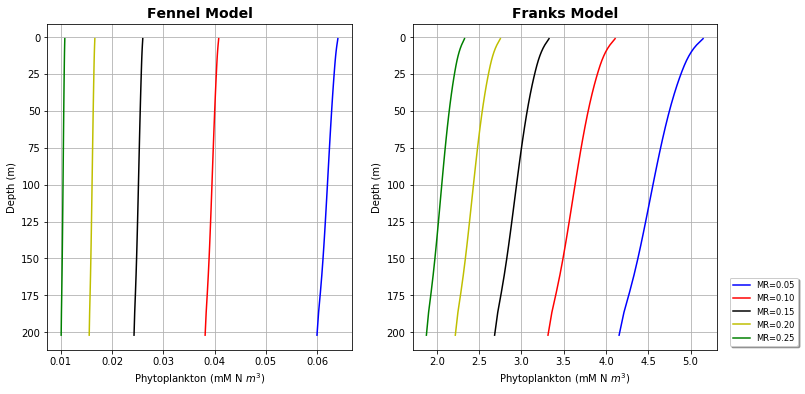

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(P05_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'b',label='MR=0.05')
ax1.plot(P10_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'r',label='MR=0.10')
ax1.plot(P15_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'k',label='MR=0.15')
ax1.plot(P20_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'y',label='MR=0.20')
ax1.plot(P25_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'g',label='MR=0.25')
ax1.invert_yaxis()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('Phytoplankton (mM N $m^3$)')
ax1.set_ylabel('Depth (m)');
ax1.set_title('Fennel Model',fontsize=14, fontweight='bold')

ax2.plot(P05_frk[-1,:,3,3],-z_rho[-1,:,3,3],'b',label='MR=0.05')
ax2.plot(P10_frk[-1,:,3,3],-z_rho[-1,:,3,3],'r',label='MR=0.10')
ax2.plot(P15_frk[-1,:,3,3],-z_rho[-1,:,3,3],'k',label='MR=0.15')
ax2.plot(P20_frk[-1,:,3,3],-z_rho[-1,:,3,3],'y',label='MR=0.20')
ax2.plot(P25_frk[-1,:,3,3],-z_rho[-1,:,3,3],'g',label='MR=0.25')
ax2.invert_yaxis()
ax2.grid(b='True', which='major', axis='both')
ax2.set_xlabel('Phytoplankton (mM N $m^3$)')
ax2.set_ylabel('Depth (m)');
ax2.set_title('Franks Model',fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', shadow=True, fontsize='small', bbox_to_anchor=(1.28, 0.0));


### 2. Zooplankton
The effect of phytoplankton mortality rate on zooplankton concentration is minimum. However, as mortality rate of phytoplankton decrease, the food availability for zooplankton increase, therefore their concentration increase slightly.

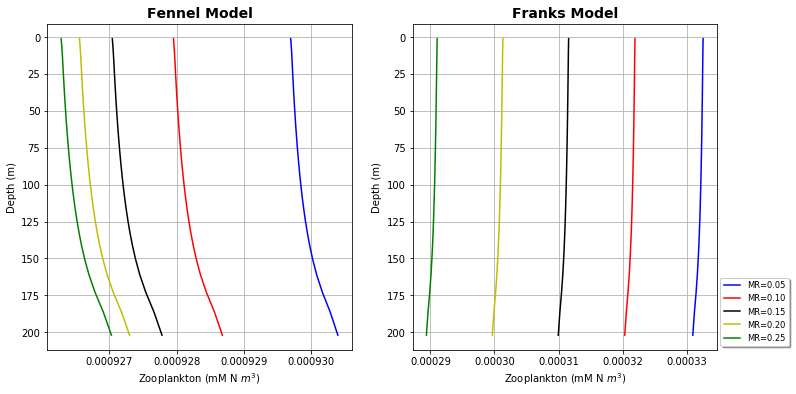

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(Z05_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'b',label='MR=0.05')
ax1.plot(Z10_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'r',label='MR=0.10')
ax1.plot(Z15_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'k',label='MR=0.15')
ax1.plot(Z20_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'y',label='MR=0.20')
ax1.plot(Z25_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'g',label='MR=0.25')
ax1.invert_yaxis()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('Zooplankton (mM N $m^3$)')
ax1.set_ylabel('Depth (m)');
ax1.set_title('Fennel Model',fontsize=14, fontweight='bold')

ax2.plot(Z05_frk[-1,:,3,3],-z_rho[-1,:,3,3],'b',label='MR=0.05')
ax2.plot(Z10_frk[-1,:,3,3],-z_rho[-1,:,3,3],'r',label='MR=0.10')
ax2.plot(Z15_frk[-1,:,3,3],-z_rho[-1,:,3,3],'k',label='MR=0.15')
ax2.plot(Z20_frk[-1,:,3,3],-z_rho[-1,:,3,3],'y',label='MR=0.20')
ax2.plot(Z25_frk[-1,:,3,3],-z_rho[-1,:,3,3],'g',label='MR=0.25')
ax2.invert_yaxis()
ax2.grid(b='True', which='major', axis='both')
ax2.set_xlabel('Zooplankton (mM N $m^3$)')
ax2.set_ylabel('Depth (m)');
ax2.set_title('Franks Model',fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', shadow=True, fontsize='small', bbox_to_anchor=(1.25, 0.0));

### 3. Nitrate
Nitrate has an inverse relation with primary production and phytoplankton concentration. As mortality of phytoplankton increase the nitrate consumption decreases.

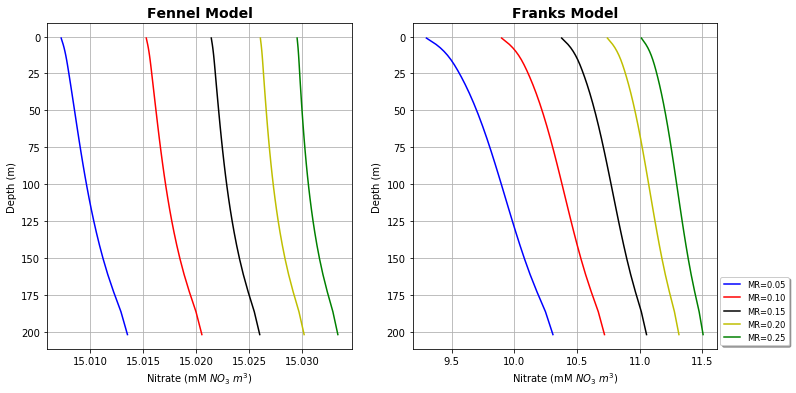

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(N05_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'b',label='MR=0.05')
ax1.plot(N10_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'r',label='MR=0.10')
ax1.plot(N15_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'k',label='MR=0.15')
ax1.plot(N20_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'y',label='MR=0.20')
ax1.plot(N25_fnl[-1,:,3,3],-z_rho[-1,:,3,3],'g',label='MR=0.25')
ax1.invert_yaxis()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('Nitrate (mM $NO_3$ $m^3$)')
ax1.set_ylabel('Depth (m)');
ax1.set_title('Fennel Model',fontsize=14, fontweight='bold')

ax2.plot(N05_frk[-1,:,3,3],-z_rho[-1,:,3,3],'b',label='MR=0.05')
ax2.plot(N10_frk[-1,:,3,3],-z_rho[-1,:,3,3],'r',label='MR=0.10')
ax2.plot(N15_frk[-1,:,3,3],-z_rho[-1,:,3,3],'k',label='MR=0.15')
ax2.plot(N20_frk[-1,:,3,3],-z_rho[-1,:,3,3],'y',label='MR=0.20')
ax2.plot(N25_frk[-1,:,3,3],-z_rho[-1,:,3,3],'g',label='MR=0.25')
ax2.invert_yaxis()
ax2.grid(b='True', which='major', axis='both')
ax2.set_xlabel('Nitrate (mM $NO_3$ $m^3$)')
ax2.set_ylabel('Depth (m)');
ax2.set_title('Franks Model',fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', shadow=True, fontsize='small', bbox_to_anchor=(1.25, 0.0));